STEP 0: PROBLEM STATEMENT
In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them

The dataset contains 43 different classes of images.

Classes are as listed below:

( 0, b'Speed limit (20km/h)') 

( 1, b'Speed limit (30km/h)')

( 2, b'Speed limit (50km/h)') 

( 3, b'Speed limit (60km/h)')

( 4, b'Speed limit (70km/h)') 

( 5, b'Speed limit (80km/h)')

( 6, b'End of speed limit (80km/h)') 

( 7, b'Speed limit (100km/h)')

( 8, b'Speed limit (120km/h)') 

( 9, b'No passing')

(10, b'No passing for vehicles over 3.5 metric tons')

(11, b'Right-of-way at the next intersection') 

(12, b'Priority road')

(13, b'Yield') (14, b'Stop') 

(15, b'No vehicles')

(16, b'Vehicles over 3.5 metric tons prohibited') 

(17, b'No entry')

(18, b'General caution') 

(19, b'Dangerous curve to the left')

(20, b'Dangerous curve to the right') 

(21, b'Double curve')

(22, b'Bumpy road') 

(23, b'Slippery road')

(24, b'Road narrows on the right') 

(25, b'Road work')

(26, b'Traffic signals') 

(27, b'Pedestrians') 

(28, b'Children crossing')

(29, b'Bicycles crossing') 

(30, b'Beware of ice/snow')

(31, b'Wild animals crossing')

(32, b'End of all speed and passing limits') 

(33, b'Turn right ahead')

(34, b'Turn left ahead') 

(35, b'Ahead only') 

(36, b'Go straight or right')

(37, b'Go straight or left') 

(38, b'Keep right') 

(39, b'Keep left')

(40, b'Roundabout mandatory') 

(41, b'End of no passing')

(42, b'End of no passing by vehicles over 3.5 metric tons')


In [1]:
# Module Imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import cv2

In [2]:
# Reading Dataset
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
# Initialize
X_train,y_train = train['features'],train['labels']
X_validation , y_validation = valid['features'],valid['labels']
X_test , y_test = test['features'],test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
X_test.shape

(12630, 32, 32, 3)

# Image exploration

41

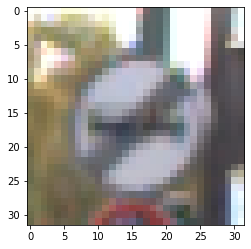

In [6]:
i =102
plt.imshow(X_train[i])
y_train[i]


# Data preparation

In [7]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [8]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [9]:
X_test_gray.shape

(12630, 32, 32, 1)

In [10]:
X_train_gray.shape

(34799, 32, 32, 1)

In [11]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [12]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

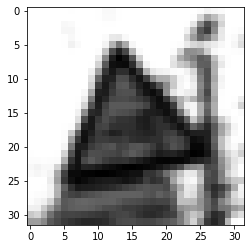

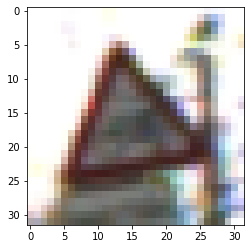

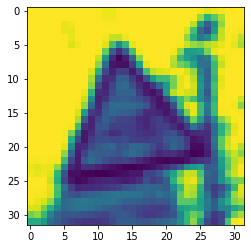

In [13]:
i=234
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze())

# Data model

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [15]:
cnn_model= Sequential()
cnn_model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120,activation='relu'))

cnn_model.add(Dense(units=84,activation='relu'))

cnn_model.add(Dense(units=43,activation='softmax'))

In [16]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [17]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 10s 136ms/step - loss: 3.1695 - accuracy: 0.1679 - val_loss: 2.7515 - val_accuracy: 0.2941
Epoch 2/50
70/70 [==============================] - 10s 139ms/step - loss: 1.7680 - accuracy: 0.5024 - val_loss: 1.5823 - val_accuracy: 0.5429
Epoch 3/50
70/70 [==============================] - 9s 134ms/step - loss: 1.0388 - accuracy: 0.7007 - val_loss: 1.1836 - val_accuracy: 0.6460
Epoch 4/50
70/70 [==============================] - 9s 124ms/step - loss: 0.7268 - accuracy: 0.7930 - val_loss: 0.9972 - val_accuracy: 0.7036
Epoch 5/50
70/70 [==============================] - 9s 126ms/step - loss: 0.5561 - accuracy: 0.8471 - val_loss: 0.8615 - val_accuracy: 0.7551
Epoch 6/50
70/70 [==============================] - 9s 127ms/step - loss: 0.4656 - accuracy: 0.8732 - val_loss: 0.8140 - val_accuracy: 0.7694
Epoch 7/50
70/70 [==============================] - 9s 132ms/step - loss: 0.3953 - accuracy: 0.8913 - val_loss: 0.7772 - val_accuracy: 0.7814
Epoc

# Model evaluation

In [18]:
score = cnn_model.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 1.7941 - accuracy: 0.8353
Test Accuracy: 0.8353127241134644


In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

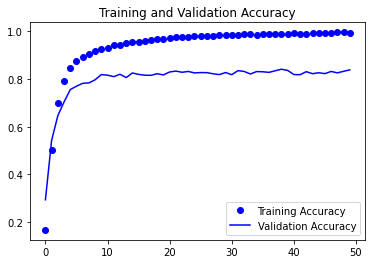

In [21]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

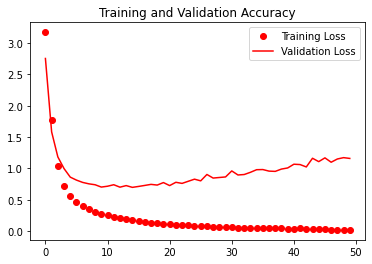

In [22]:
plt.plot(epochs,loss,'ro',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

In [23]:
predict_classes=cnn_model.predict_classes(X_test_gray_norm)
y_true=y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


# Confusion matrix

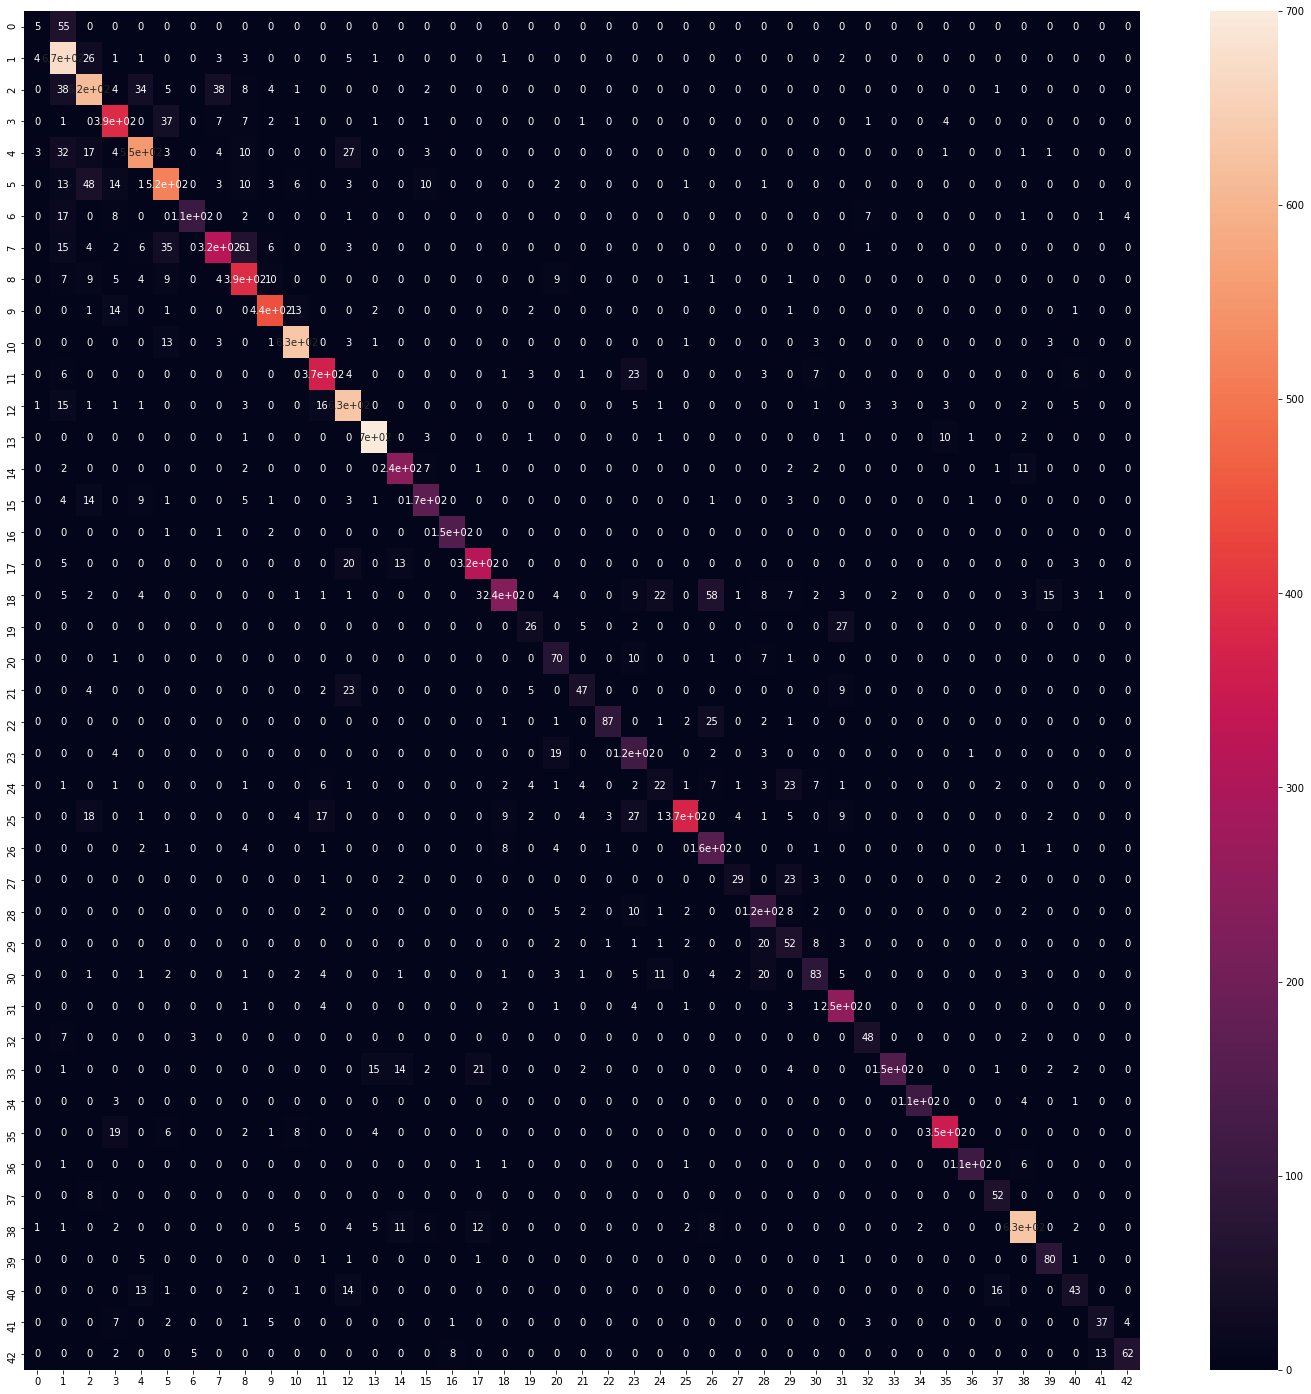

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,predict_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)

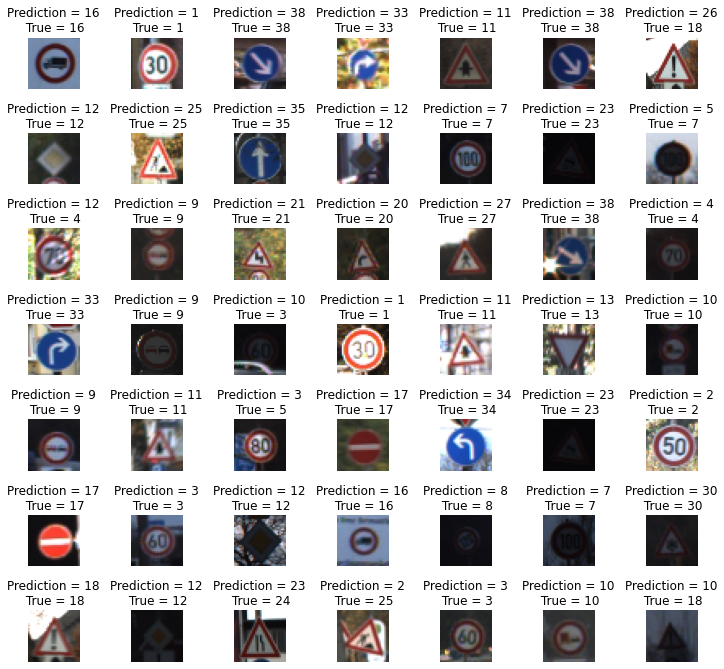

In [25]:
L=7
W=7
fig,axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predict_classes[i],y_true[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)    

# Model saving

In [26]:
import os 
directory = os.path.join(os.getcwd(),'Model')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory,'Weight files.h5')
cnn_model.save(model_path)